# Weather Forecast Using  PyOWM
The goal of this notebook is to perform a weather forecast with the library pyown executed by Papermill.<br>
PyOWM is a wrapper for OpenWeatherMap web APIs providing a easier interface to fetch weather data.<br><br>
More information on the links below:<br>
* https://pypi.org/project/pyowm/
* https://pyowm.readthedocs.io/en/latest/usage-examples-v2/weather-api-usage-examples.html



## 1. Accessing pyown API
On the first steps of our analysis we are going to get weather information for the define city using pyown API. <br>
The information is going to be organized on a dictionary, and later loaded as a pandas DataFrame for performing the Data wrangling.

In [65]:
# import libraries
#from pyowm import OWM
import pyowm
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


### 1.1 Setting PyOWM API key and defining variable
This first part of the workflow we define the API key to access OpenWeather service and also the cell to contain the parameter `city` that can be defined using Papermill.

In [2]:
# Set API key
owm = pyowm.OWM('3fb62110b42fec1124c89b9931aed05b')

In [3]:
# Define the default parameters
city = 'New York,US'

### 1.2 Fetching weather information for the defined city
On this part we are going to use PyOWM to fetch data about the city and organized it first on a dictionary, them on a Pandas DataFrame.

In [6]:
# Instantiate forecast object and fetch weather information about city
fc = owm.three_hours_forecast(city)
forecast = fc.get_forecast()

In [7]:
# Create a dictionary to organize the forecast data for the city of interest
dict_forecast = {
    'datetime':[],
    'clouds':[],
    'humidity':[],
    'temp':[],
    'temp_max':[],
    'temp_min':[],
    'detailed_status':[],
    'icon_url':[],
    'rain_vol':[]
}

In [8]:
#Itereate over forecast object acessing the weather features
for weather in forecast:
    dict_forecast['datetime'].append(str(weather.get_reference_time(timeformat='iso')))
    dict_forecast['clouds'].append(weather.get_clouds())
    dict_forecast['humidity'].append(weather.get_humidity())
    dict_forecast['temp'].append(weather.get_temperature(unit='celsius').get('temp'))
    dict_forecast['temp_max'].append(weather.get_temperature(unit='celsius').get('temp_max'))
    dict_forecast['temp_min'].append(weather.get_temperature(unit='celsius').get('temp_min'))
    
    dict_forecast['detailed_status'].append(weather.get_detailed_status())
    dict_forecast['icon_url'].append(weather.get_weather_icon_url())
    if '3h' in weather.get_rain().keys():
        dict_forecast['rain_vol'].append(weather.get_rain().get('3h'))
    else:
        dict_forecast['rain_vol'].append(0)

In [9]:
# Create Dataframe from dictionary
df = pd.DataFrame.from_dict(dict_forecast)

In [10]:
# Set dtype to datetime for 'datetime' column 
df['datetime'] = pd.to_datetime(df['datetime'])

In [28]:
df

,datetime,clouds,humidity,temp,temp_max,temp_min,detailed_status,icon_url,rain_vol
0,2019-12-06 03:00:00+00:00,21,63,2.05,3.48,2.05,few clouds,http://openweathermap.org/img/w/02n.png,0.00
1,2019-12-06 06:00:00+00:00,12,65,1.34,2.41,1.34,few clouds,http://openweathermap.org/img/w/02n.png,0.00
2,2019-12-06 09:00:00+00:00,70,64,1.21,1.93,1.21,broken clouds,http://openweathermap.org/img/w/04n.png,0.00
3,2019-12-06 12:00:00+00:00,82,66,1.47,1.83,1.47,broken clouds,http://openweathermap.org/img/w/04n.png,0.00
4,2019-12-06 15:00:00+00:00,49,67,3.58,3.58,3.58,scattered clouds,http://openweathermap.org/img/w/03d.png,0.00
5,2019-12-06 18:00:00+00:00,74,63,7.39,7.39,7.39,broken clouds,http://openweathermap.org/img/w/04d.png,0.00
6,2019-12-06 21:00:00+00:00,100,65,9.00,9.00,9.00,overcast clouds,http://openweathermap.org/img/w/04d.png,0.00
7,2019-12-07 00:00:00+00:00,100,70,8.77,8.77,8.77,overcast clouds,http://openweathermap.org/img/w/04n.png,0.00
8,2019-12-07 03:00:00+00:00,88,64,6.00,6.00,6.00,light rain,http://openweathermap.org/img/w/10n.png,0.06
9,2019-12-07 06:00:00+00:00,44,67,3.47,3.47,3.47,scattered clouds,http://openweathermap.org/img/w/03n.png,0.00


### 1.3 Understanding the DataFrame generated from the returned data.
The function `owm.three_hours_forecast(city)` returns us information in 3 hour steps, for the next 5 days, with a total of 40 data points.
We decided to work with the following variables:
* clouds
* humidity
* temp
* temp_max
* temp_min
* detailed_status
* rain_vol

### 1.4 Aggregating data based on the days
On this step we are going to aggregate the data by day to facilitate the understanding and the plotting.

In [12]:
# Create a dataframe agregating the values based on each day
# for mean
df_mean = df.resample('D', on='datetime').mean()
df_mean.index = df_mean.index.date
#df_mean.drop('datetime', axis=1, inplace=True)
df_mean

,clouds,humidity,temp,temp_max,temp_min,rain_vol
2019-12-06,92.00,62.000000,9.82000,9.82000,8.54500,0.000000
2019-12-07,48.75,61.125000,4.09750,4.09750,3.96125,0.055000
2019-12-08,44.00,56.250000,2.80500,2.80500,2.80500,0.000000
2019-12-09,100.00,86.125000,9.25875,9.25875,9.25875,2.172500
2019-12-10,100.00,91.000000,12.58625,12.58625,12.58625,1.721250
2019-12-11,100.00,75.166667,6.57500,6.57500,6.57500,2.636667


In [13]:
# for max
df_max = df.resample('D', on='datetime').max()
df_max.index = df_max.index.date
df_max.drop('datetime', axis=1, inplace=True)

df_max

,clouds,humidity,temp,temp_max,temp_min,detailed_status,icon_url,rain_vol
2019-12-06,96,65,10.33,10.33,9.24,overcast clouds,http://openweathermap.org/img/w/04d.png,0.00
2019-12-07,100,70,9.85,9.85,9.12,scattered clouds,http://openweathermap.org/img/w/10n.png,0.38
2019-12-08,100,61,7.36,7.36,7.36,scattered clouds,http://openweathermap.org/img/w/04d.png,0.00
2019-12-09,100,97,12.06,12.06,12.06,overcast clouds,http://openweathermap.org/img/w/10n.png,8.81
2019-12-10,100,94,13.96,13.96,13.96,moderate rain,http://openweathermap.org/img/w/10n.png,6.63
2019-12-11,100,88,10.67,10.67,10.67,overcast clouds,http://openweathermap.org/img/w/13n.png,7.19


In [14]:
# for min
df_min = df.resample('D', on='datetime').min()
df_min.index = df_min.index.date
df_min.drop('datetime', axis=1, inplace=True)
df_min

,clouds,humidity,temp,temp_max,temp_min,detailed_status,icon_url,rain_vol
2019-12-06,88,59,9.31,9.31,7.85,overcast clouds,http://openweathermap.org/img/w/04d.png,0.00
2019-12-07,0,51,1.60,1.60,1.60,broken clouds,http://openweathermap.org/img/w/01d.png,0.00
2019-12-08,0,54,0.37,0.37,0.37,broken clouds,http://openweathermap.org/img/w/01n.png,0.00
2019-12-09,100,67,7.66,7.66,7.66,light rain,http://openweathermap.org/img/w/04n.png,0.00
2019-12-10,100,86,11.85,11.85,11.85,light rain,http://openweathermap.org/img/w/10d.png,0.19
2019-12-11,100,61,4.31,4.31,4.31,light rain,http://openweathermap.org/img/w/04d.png,0.00


In [15]:
# Create a Dataframe with temperature values (min, max, average) by merging on index
df_temp = df_min[['temp']].merge(df_max[['temp']], 
                                 left_index=True, 
                                 right_index=True, 
                                 suffixes=('_min', '_max')).merge(df_mean[['temp']],
                                                                  left_index=True, 
                                                                  right_index=True)
# Rename columns
df_temp.columns = ['temp_min', 'temp_max', 'temp_mean']
df_temp

,temp_min,temp_max,temp_mean
2019-12-06,9.31,10.33,9.82000
2019-12-07,1.60,9.85,4.09750
2019-12-08,0.37,7.36,2.80500
2019-12-09,7.66,12.06,9.25875
2019-12-10,11.85,13.96,12.58625
2019-12-11,4.31,10.67,6.57500


## 2 Creating the visualizations
On this part, we are going to plot the organized data using seaborn.

### 2.1 Temperature plot
Show the forecast for maximun, minimun and average temperature for the next 5 days on the same plots.

/home/gabriel/miniconda3/envs/papermill/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


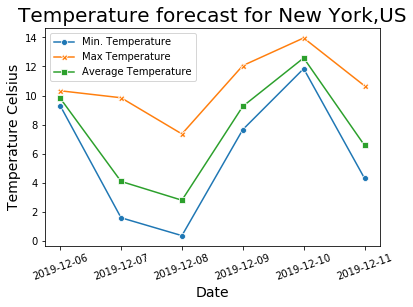

In [16]:
sns_plot = sns.lineplot(data=df_temp, style="event",markers=True, dashes=False)
sns_plot.set_title(f'Temperature forecast for {city}', fontsize=20)
sns_plot.set_xlabel('Date', fontsize=14)
sns_plot.set_ylabel('Temperature Celsius', fontsize=14)
sns_plot.set_xticklabels(df_temp.index, rotation=20)
sns_plot.legend(labels=['Min. Temperature', 'Max Temperature', 'Average Temperature'])

sns_plot.figure.savefig(f'{city}_temperature.png', 
                  dpi=600, facecolor='w', 
                  orientation='portrait',
                  figsize=(21, 9))


### 2.2 Humidity, rain and clouds plot
On this plot we are going to aggregate the data about pluviometry and humidity.

In [21]:
# Create a Dataframe with total expected volume for rain on each day
df_rain_per_day = df.resample('D', on='datetime').sum()[['rain_vol']]
df_rain_per_day.index = df_rain_per_day.index.date
df_rain_per_day

,rain_vol
2019-12-06,0.00
2019-12-07,0.44
2019-12-08,0.00
2019-12-09,17.38
2019-12-10,13.77
2019-12-11,15.82


In [70]:
df_mean

,clouds,humidity,temp,temp_max,temp_min,rain_vol
2019-12-06,92.00,62.000000,9.82000,9.82000,8.54500,0.000000
2019-12-07,48.75,61.125000,4.09750,4.09750,3.96125,0.055000
2019-12-08,44.00,56.250000,2.80500,2.80500,2.80500,0.000000
2019-12-09,100.00,86.125000,9.25875,9.25875,9.25875,2.172500
2019-12-10,100.00,91.000000,12.58625,12.58625,12.58625,1.721250
2019-12-11,100.00,75.166667,6.57500,6.57500,6.57500,2.636667


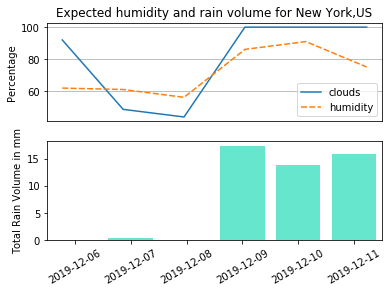

In [101]:
fig = plt.figure()
ax1 = fig.add_subplot(211)
ax1 = sns.lineplot(data=df_mean[['clouds', 'humidity']])
ax1.set_xticks([])
ax1.set_title(f'Expected humidity and rain volume for {city}')
#ax1.grid(b=True, which='major', color='grey', linewidth=0.3)
ax1.set_ylabel('Percentage')
ax1.grid(True) # Show the vertical gridlines


ax2 = fig.add_subplot(212)
ax2 = sns.barplot(x=df_rain_per_day.index, y='rain_vol', 
                  data=df_rain_per_day,
                  facecolor=(0.4, 0.9, 0.8, 1))
ax2.set_xticklabels(df_temp.index, rotation=30)
ax2.set_ylabel('Total Rain Volume in mm')


plt.show()

